<a href="https://colab.research.google.com/github/Sergio-Tellz21/upsrj-keras-workspace/blob/main/DNNlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#URL del dataset a utilizar
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
#carga de detos del url
data = pd.read_excel(url)
#mostrar las primeras filas
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
#columna de strengh
strenght_column= "Concrete compressive strength(MPa, megapascals) "

In [3]:
# separar predictores
predictors = data.drop(columns=["Concrete compressive strength(MPa, megapascals) "])
predictors.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [4]:
selector = data[strenght_column]
selector.head()


,"Concrete compressive strength(MPa, megapascals)"
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


In [5]:
#obtenemos el numero de columnas de nuestras predictores
n_cols = predictors.shape[1]
print(n_cols)

8


definir el modelo necesitamos generar un modelo secuencial con una red neuronal densa (DNN) con una capa de entrada, una capa oculta y una capa de salida, la capa de salida contendra solo una neurona sobre la cual va a divergir todo el contenido de la capa previa.

In [6]:
from keras.models import Sequential
from keras.layers import Dense

#creamos un modelo sencuencial
model = Sequential()

#definimos capa de entrada y ocultas
model.add(Dense(5, activation= 'relu',input_shape=(n_cols, )))

#definimos capa oculta
model.add(Dense(5, activation= 'relu'))

#definimos capa de salida ( una sola neurona)
model.add(Dense(1))

#compilamos
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# entrenamiento
history = model.fit(predictors, selector, epochs=50, verbose=1)

#Predicción (with all predictors)
predictions = model.predict(predictors)
print(predictions)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2393.7573
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1687.0875
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1643.4940
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1567.5004
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1562.2209
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1580.0747
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1548.2435
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1538.9490
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1543.2615
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1508.5272
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1505.2854
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1576.0356
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1566.9954
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1536.2540
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3

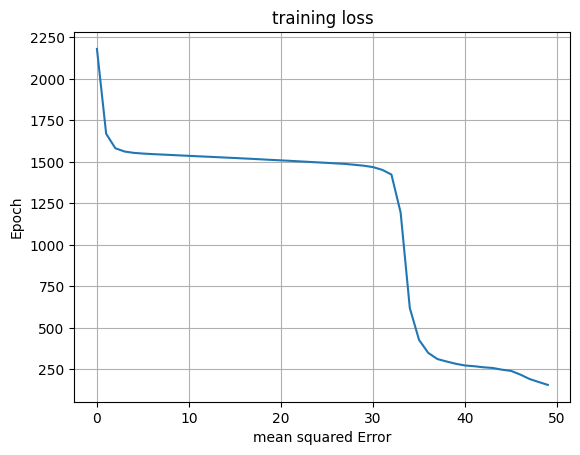

In [9]:
import matplotlib.pyplot as plt
#grafica de perdida
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('Epoch')
plt.xlabel('mean squared Error')
plt.grid(True)
plt.show()

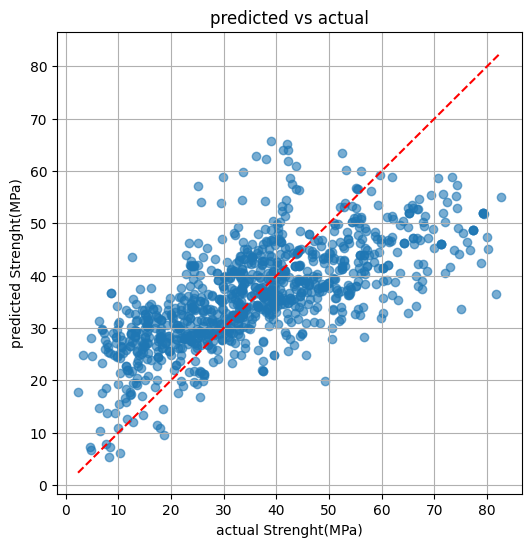

Shape of selector: (1030,)
Shape of predictions: (1030, 1)


In [10]:
import matplotlib.pyplot as plt

#grafica de dispersión
plt.figure(figsize=(6,6))
plt.scatter(selector, predictions, alpha=0.6)
plt.xlabel('actual Strenght(MPa)')
plt.ylabel('predicted Strenght(MPa)')
plt.title('predicted vs actual')
plt.grid(True)
plt.plot([selector.min(), selector.max()], [selector.min(), selector.max()], 'r--')
plt.show()
print("Shape of selector:", selector.shape)
print("Shape of predictions:", predictions.shape)

##ejercicio: Mejorar una red densa con keras**

##Objetivo.
predecir la resistencia del concreto mejorando la red original mediante


*   más capas ocultas
*   mas epochs
*   Integración de funciones de activación no lineales (sigmoidea)

##Instrucciones:
1. Aumenta la densidad de la capa de entrada de 8 a 10 nodos
2. Modifica las capas ocultas de la red para que sean 3, con la siguiente numero de nodos respectivamente: 10,8,6.
3. Cambia la función de activacion de la capa de salida por una sigmoidea
4. Alimentda la red con un valor de 200 nodos


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 50208.2773
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15051.7881
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2802.6035
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 517.5963
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 380.8175
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 360.7999
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335.8605
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 334.5081
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 329.8488
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 295.5772
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310.7434
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 291.5394
Epoch 13/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 279.1685
Epoch 14/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 293.8846
Epoch 15/200
33/33 ━━━━━━━━━━━━━━━━━━━

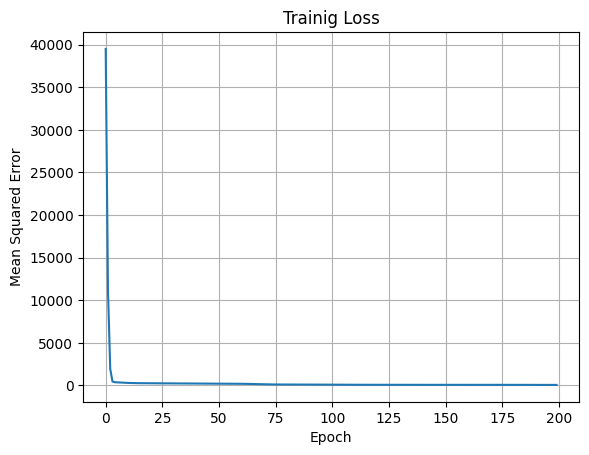

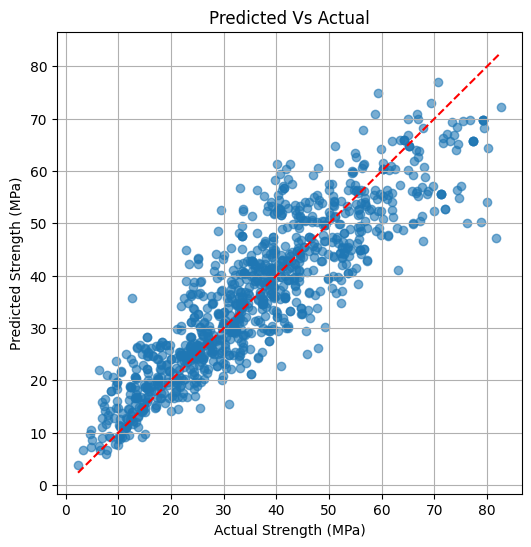

In [21]:
model_improved = Sequential()

# Input layer
model.add(Dense(10, activation='relu', input_shape=(n_cols, )))
# Hidden layers
model_improved.add(Dense(10, activation='relu'))
model_improved.add(Dense(8, activation='relu'))
model_improved.add(Dense(6, activation='relu'))
# Output layer
model_improved.add(Dense(1, activation='linear'))

model_improved.compile(optimizer='adam', loss='mean_squared_error')

#Entrenamiento
history_improved = model_improved.fit(predictors, selector, epochs=200, verbose=1)

#Predicción (con los primeros elementos de los predictores)
prediction_improved = model_improved.predict(predictors)

# Gráfico de perdida
plt.plot(history_improved.history['loss'])
plt.title('Trainig Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

#Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(selector, prediction_improved, alpha=0.6)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Predicted Vs Actual')
plt.grid(True)
plt.plot([selector.min(), selector.max()], [selector.min(), selector.max()], 'r--')
plt.show()